<a href="https://colab.research.google.com/github/Ebonica/CODE-CRAFTERS-DATA-SCIENCE-EBONICA-SALETH/blob/main/CODE_CRAFTERS_TASK_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODE CRAFTERS TASK 6 DATA SCIENCE AND MACHINE LEARNING**

**SENTIMENT ANALYSIS USING NATURAL LANGUAGE PROCESSING**

In [120]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**LOADING THE DATASET**

In [117]:
# Download the movie reviews dataset from NLTK
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [118]:
# Load the movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

**READING THE DATASET DOWNLOADED FROM NLTK**

In [121]:
df = pd.DataFrame(documents, columns=['words', 'sentiment'])

# Converting sentiment labels to 'positive' and 'negative'
df['sentiment'] = df['sentiment'].apply(lambda x: 'positive' if x == 'pos' else 'negative')

In [122]:
df

,words,sentiment
0,"[plot, :, two, teen, couples, go, to, a, churc...",negative
1,"[the, happy, bastard, ', s, quick, movie, revi...",negative
2,"[it, is, movies, like, these, that, make, a, j...",negative
3,"["", quest, for, camelot, "", is, warner, bros, ...",negative
4,"[synopsis, :, a, mentally, unstable, man, unde...",negative
...,...,...
1995,"[wow, !, what, a, movie, ., it, ', s, everythi...",positive
1996,"[richard, gere, can, be, a, commanding, actor,...",positive
1997,"[glory, --, starring, matthew, broderick, ,, d...",positive
1998,"[steven, spielberg, ', s, second, epic, film, ...",positive


**DATA EXPLORATION**

In [123]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                                               words sentiment
0  [plot, :, two, teen, couples, go, to, a, churc...  negative
1  [the, happy, bastard, ', s, quick, movie, revi...  negative
2  [it, is, movies, like, these, that, make, a, j...  negative
3  [", quest, for, camelot, ", is, warner, bros, ...  negative
4  [synopsis, :, a, mentally, unstable, man, unde...  negative


In [124]:
print("Last few rows of the dataset:")
print(df.tail())

Last few rows of the dataset:
                                                  words sentiment
1995  [wow, !, what, a, movie, ., it, ', s, everythi...  positive
1996  [richard, gere, can, be, a, commanding, actor,...  positive
1997  [glory, --, starring, matthew, broderick, ,, d...  positive
1998  [steven, spielberg, ', s, second, epic, film, ...  positive
1999  [truman, (, ", true, -, man, ", ), burbank, is...  positive


In [125]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   words      2000 non-null   object
 1   sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [126]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                                                    words sentiment
count                                                2000      2000
unique                                               2000         2
top     [plot, :, two, teen, couples, go, to, a, churc...  negative
freq                                                    1      1000


In [127]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
words        0
sentiment    0
dtype: int64


In [128]:
print("\nColumns:")
print(df.columns)


Columns:
Index(['words', 'sentiment'], dtype='object')


In [129]:
print("Number of reviews:", len(df))
print("\nSentiment distribution:\n", df['sentiment'].value_counts())

Number of reviews: 2000

Sentiment distribution:
 negative    1000
positive    1000
Name: sentiment, dtype: int64


In [130]:
print("\nShape:")
print(df.shape)


Shape:
(2000, 2)


In [131]:
print("\nDATA TYPES:")
print(df.dtypes)


DATA TYPES:
words        object
sentiment    object
dtype: object


In [132]:
print("\n Access the 21th row (index 20)")
df.iloc[20]


 Access the 21th row (index 20)


words        [", spawn, ", features, good, guys, ,, bad, gu...
sentiment                                             negative
Name: 20, dtype: object

In [133]:
df['words_tuple'] = df['words'].apply(tuple)

# Finding the number of unique reviews
unique_review_counts = df['words_tuple'].nunique()
print("Number of unique reviews:", unique_review_counts)

Number of unique reviews: 2000


In [134]:
from nltk import FreqDist

all_words = [word for words in df['words'] for word in words]
word_freq = FreqDist(all_words)

# Printing the most common words
print("Top 10 most common words:", word_freq.most_common(10))

Top 10 most common words: [(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]


In [135]:
# Displaying the first few positive and negative reviews
print("\nPositive Review Example:")
print(' '.join(df[df['sentiment'] == 'positive']['words'].iloc[0]))

print("\nNegative Review Example:")
print(' '.join(df[df['sentiment'] == 'negative']['words'].iloc[0]))



Positive Review Example:
films adapted from comic books have had plenty of success , whether they ' re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there ' s never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid ' 80s with a 12 - part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don ' t dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell ' s directors , albert and allen hughes . getting the hughes brothers 

**DATA VISUALIZATION**

(-0.5, 799.5, 399.5, -0.5)

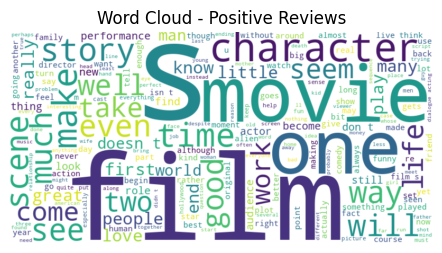

In [136]:
from wordcloud import WordCloud

# Word clouds for positive and negative reviews
positive_words = ' '.join(df[df['sentiment'] == 'positive']['words'].apply(' '.join))
negative_words = ' '.join(df[df['sentiment'] == 'negative']['words'].apply(' '.join))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')

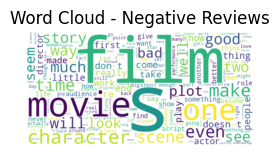

In [137]:
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')

plt.show()

In [138]:
# Calculating the length of each review
df['review_length'] = df['words'].apply(len)

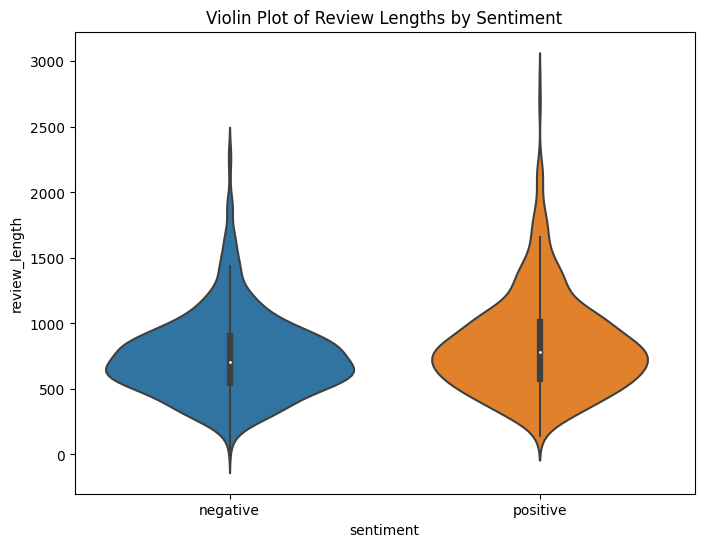

In [139]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='sentiment', y='review_length', data=df)
plt.title('Violin Plot of Review Lengths by Sentiment')
plt.show()

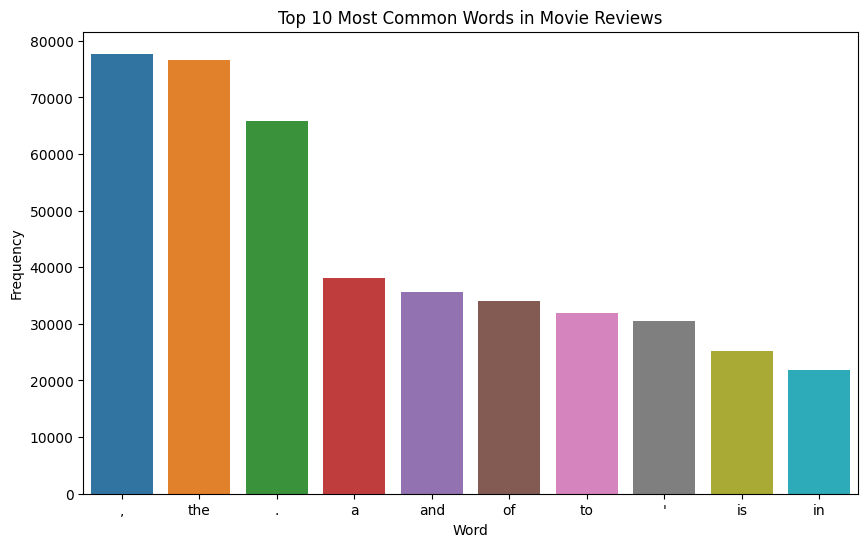

In [140]:
N = 10
top_words = word_freq.most_common(N)

plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title(f'Top {N} Most Common Words in Movie Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

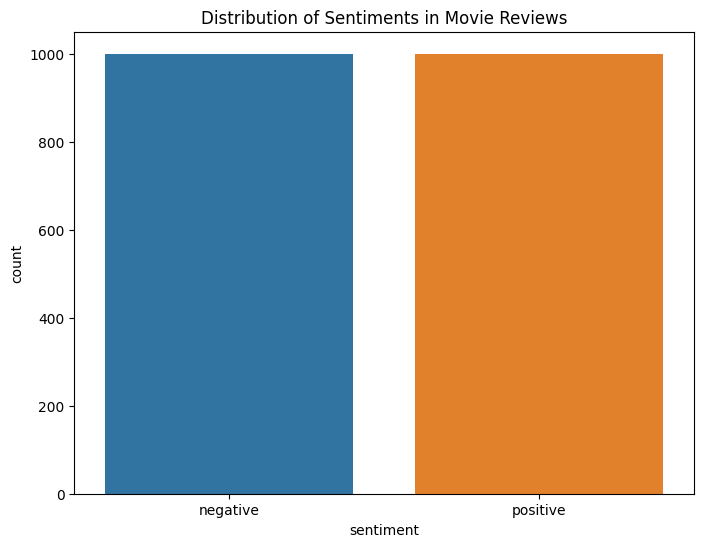

In [141]:
# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments in Movie Reviews')
plt.show()

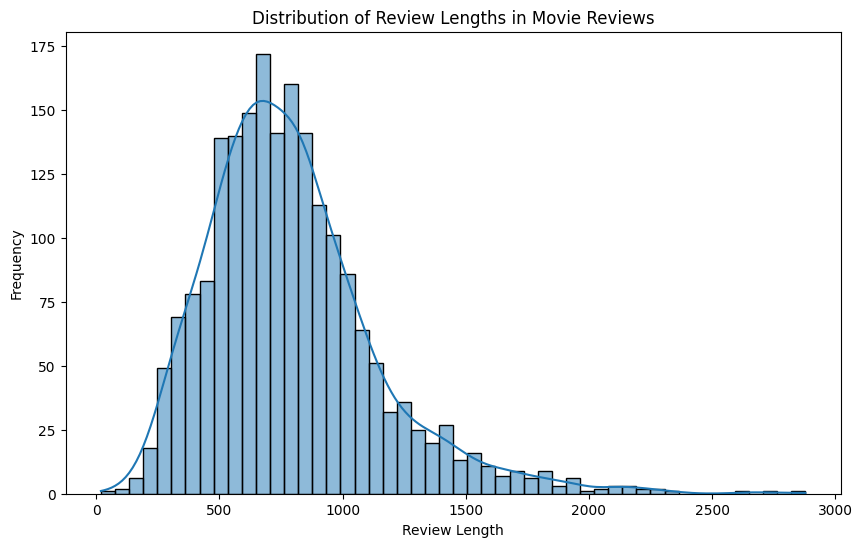

In [143]:
# Visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths in Movie Reviews')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [144]:
# Shuffle the documents to create a balanced dataset
import random
random.shuffle(documents)

**TRAIN TEST SPLIT**

In [145]:
# Split the dataset into training and testing sets
train_set, test_set = train_test_split(documents, test_size=0.2, random_state=42)

**DATA PREPROCESSING**

In [146]:
# Extract features from the text using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train = tfidf_vectorizer.fit_transform([' '.join(words) for words, category in train_set])
y_train = [1 if category == 'pos' else 0 for words, category in train_set]

X_test = tfidf_vectorizer.transform([' '.join(words) for words, category in test_set])
y_test = [1 if category == 'pos' else 0 for words, category in test_set]

**MODELS TRAINING**

**1. NAIVE BAYES CLASSIFIER MODEL**

In [147]:
# Train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [148]:
# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)


In [149]:
print("PREDICTED VALUES:",y_pred)

PREDICTED VALUES: [1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1
 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1]


**MODEL EVALUATION**

**ACCURACY**

In [150]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy:.2f}')

Naive Bayes Accuracy: 0.82


**CONFUSION MATRIX**

In [154]:
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix_nb}")

Confusion Matrix:
[[170  23]
 [ 49 158]]


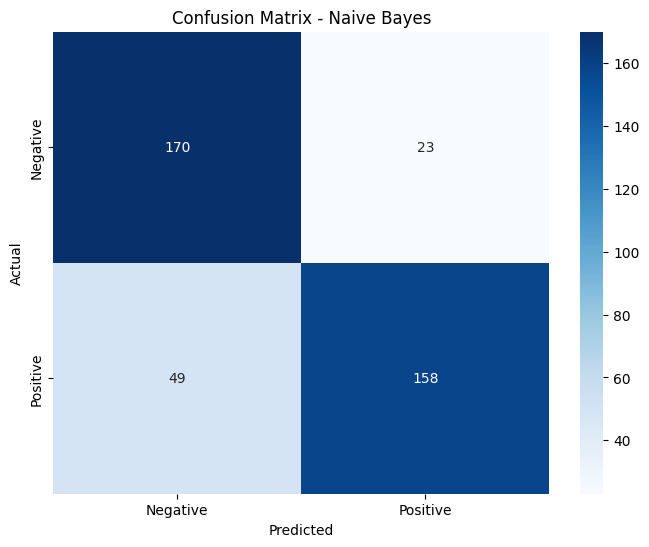

In [155]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**CLASSIFICATION REPORT**

In [156]:
print('\n Naive Bayes Classification Report:\n', classification_report(y_test, y_pred))


 Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       193
           1       0.87      0.76      0.81       207

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



**2. SUPPORT VECTOR MACHINE CLASSIFIER MODEL**

In [157]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [158]:
# Make predictions on the test set using SVM
y_pred_svm = svm_classifier.predict(X_test)

In [159]:
print("PREDICTED VALUES:",y_pred_svm)

PREDICTED VALUES: [1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1
 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0
 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0
 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0
 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1]


**MODEL EVALUATION**

**ACCURACY**

In [160]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'\nSVM Accuracy: {accuracy_svm:.2f}')


SVM Accuracy: 0.86


**CONFUSION MATRIX**

In [161]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(f"Confusion Matrix:\n{conf_matrix_svm}")

Confusion Matrix:
[[162  31]
 [ 26 181]]


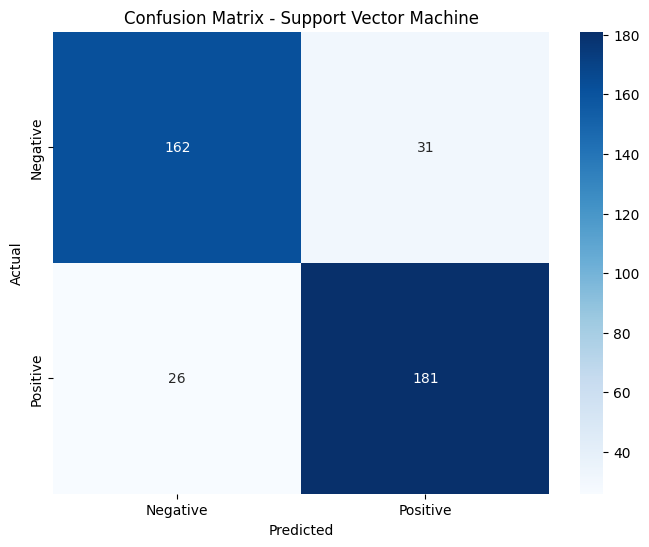

In [162]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**CLASSIFICATION REPORT**

In [163]:
print('\nSVM Classification Report:\n', classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       193
           1       0.85      0.87      0.86       207

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



**3. DECISION TREE CLASSIFIER MODEL**

In [164]:
# Train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [165]:
# Make predictions on the test set using Decision Tree
y_pred_dt = decision_tree_classifier.predict(X_test)

In [166]:
print("PREDICTED VALUES:",y_pred_dt)

PREDICTED VALUES: [1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1
 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1
 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1
 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1]


**MODEL EVALUATION**

**ACCURACY**

In [167]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'\nDecision Tree Accuracy: {accuracy_dt:.2f}')


Decision Tree Accuracy: 0.63


**CONFUSION MATRIX**

In [168]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"Confusion Matrix:\n{conf_matrix_dt}")

Confusion Matrix:
[[127  66]
 [ 81 126]]


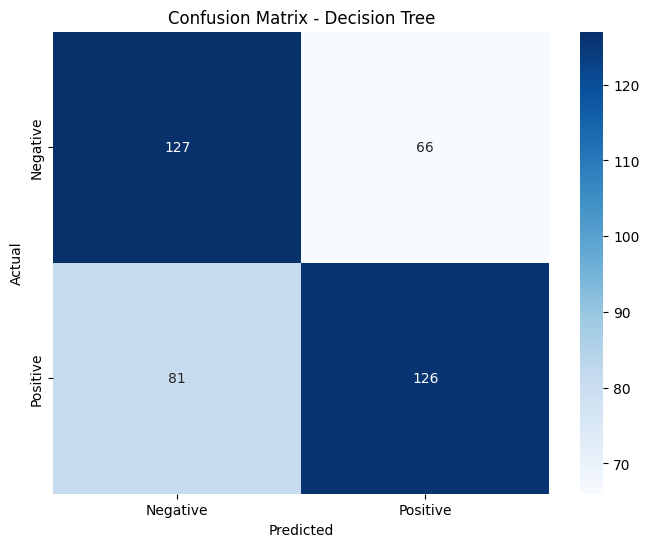

In [169]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**CLASSIFICATION REPORT**

In [170]:
print('\nDecision Tree Classification Report:\n', classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.66      0.63       193
           1       0.66      0.61      0.63       207

    accuracy                           0.63       400
   macro avg       0.63      0.63      0.63       400
weighted avg       0.63      0.63      0.63       400



**4. RANDOM FOREST MODEL**

In [171]:
# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [172]:
# Make predictions on the test set using Random Forest
y_pred_rf = random_forest_classifier.predict(X_test)

In [173]:
print("PREDICTED VALUES:",y_pred_rf)

PREDICTED VALUES: [1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0
 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1
 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0]


**MODEL EVALUATION**

**ACCURACY**

In [174]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'\nRandom Forest Accuracy: {accuracy_rf:.2f}')


Random Forest Accuracy: 0.81


**CONFUSION MATRIX**

In [175]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n{conf_matrix_rf}")

Confusion Matrix:
[[175  18]
 [ 59 148]]


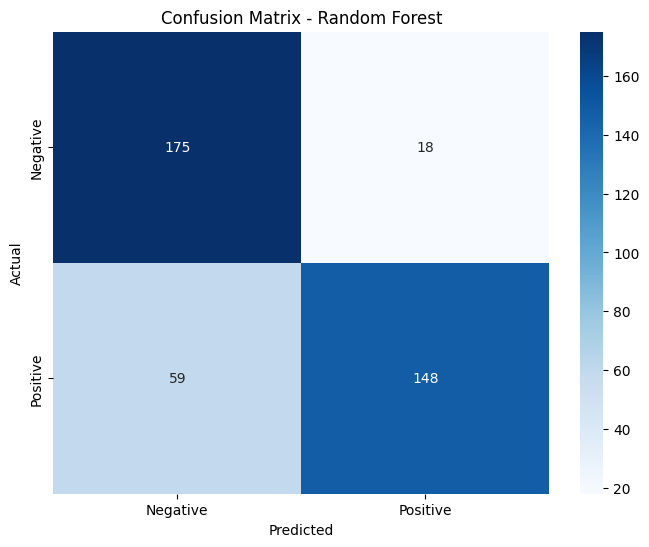

In [176]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**CLASSIFICATION REPORT**

In [177]:
print('\nRandom Forest Classification Report:\n', classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       193
           1       0.89      0.71      0.79       207

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



**5. GRADIENT BOOSTING MODEL**

In [178]:
# Train a Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [179]:
# Make predictions on the test set using Gradient Boosting
y_pred_gb = gradient_boosting_classifier.predict(X_test)

In [180]:
print("PREDICTED VALUES:",y_pred_gb)

PREDICTED VALUES: [1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0
 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1
 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1
 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1]


**MODEL EVALUATION**

**ACCURACY**

In [181]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'\nGradient Boosting Accuracy: {accuracy_gb:.2f}')


Gradient Boosting Accuracy: 0.81


**CONFUSION MATRIX**

In [182]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(f"Confusion Matrix:\n{conf_matrix_gb}")

Confusion Matrix:
[[154  39]
 [ 36 171]]


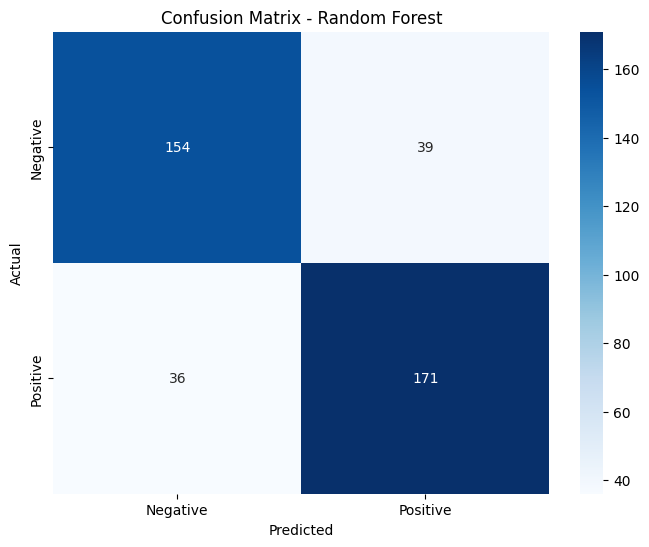

In [183]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**CLASSIFICATION REPORT**

In [184]:
print('\nGradient Boosting Classification Report:\n', classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       193
           1       0.81      0.83      0.82       207

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

